## Plan
1. Region Wise medal 
2. Region-sports-medal
3. Region-athelete-medal


In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [770]:
athlete = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [771]:
athlete 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Preprocess
1. Apply filter seaon == summer
2. Merging Table
3. Removing Duplicates

In [772]:
athlete_summer = athlete[athlete["Season"] == "Summer"]

In [773]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [774]:
athlete_summer = athlete_summer.merge(regions , on='NOC' , how="left")

In [775]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [776]:
print("Total athlete  participated in Olympics: " , len(athlete_summer["Name"].unique()))

Total athlete  participated in Olympics:  116122


In [777]:
print("Total Region participated in Olympics: " , len(athlete_summer["NOC"].unique()))

Total Region participated in Olympics:  230


In [778]:
print("Total Country participated in Olympics: " , len(athlete_summer["Team"].unique()))

Total Country participated in Olympics:  1157


In [779]:
athlete_summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
 15  region  222182 non-null  object 
 16  notes   4401 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.6+ MB


In [780]:
athlete_summer.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

#### Dropping Duplicates

In [781]:
athlete_summer.duplicated().sum()

1385

In [782]:
athlete_summer.drop_duplicates(inplace= True)

In [783]:
athlete_summer.duplicated().sum()

0

## Key Points From athlete.csv
1. Age,height & weight have NULL values
2. Medal got NULL values  maybe we need to replace the with zeroes

## GOING FOR OVERALL MEDAL TALLY

In [784]:
athlete_summer["Medal"].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [785]:
athlete_summer = pd.concat([athlete_summer,pd.get_dummies(athlete_summer["Medal"])],axis = 1)

In [786]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [787]:
#Medal Count on region Basis:
country_medal_tally = athlete_summer.groupby(athlete_summer["region"]).sum()[["Gold" , "Silver" ,"Bronze"]].sort_values("Gold" , ascending =False).reset_index()

In [790]:
country_medal_tally.head(2)

,region,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,Russia,1220.0,974.0,994.0


In [791]:
#DROPPING DUPLICATES FOR MANAGING TEAM EVENTS PROBLEMS
medal_tally = athlete_summer.drop_duplicates(subset = ["Sex" , "NOC" , "Games" , "Year" , "Sport" ,"City" ,"Event" , "Medal"] )

In [792]:
medal_tally.head(2) 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


## COUNTRY-WISE MEDAL TALLY
1. Total Medal_tally == Country
2. Country Year Wise like india in 2016,1994
3. Filter of Country And Year

In [453]:
df1 = athlete_summer.drop_duplicates(subset = ["Sex" , "NOC" , "Games" , "Year" , "Sport" ,"City" ,"Event" , "Medal"] )

In [454]:
df1.drop(["Name" , "ID" ,"Age" ,"Team","notes","NOC","Sex" ,"Height" , "Weight" , "Season" , "Games" , "City" , "Medal" ] ,inplace= True ,axis = "columns")

C:\Users\Dell\AppData\Local\Temp\ipykernel_14876\163432907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [455]:
df1.head(2)

,Year,Sport,Event,region,Bronze,Gold,Silver
0,1992,Basketball,Basketball Men's Basketball,China,0,0,0
1,2012,Judo,Judo Men's Extra-Lightweight,China,0,0,0


In [456]:
df1[df1["Year"]==2016].groupby(df1["region"]).sum()[["Gold" , "Silver" , "Bronze"]].sort_values("Gold" , ascending =False)

,Gold,Silver,Bronze
region,,,
USA,47,39,39
UK,27,24,17
China,26,18,27
Russia,19,17,20
Germany,18,11,16
...,...,...,...
Ireland,0,2,0
Israel,0,0,2
Kiribati,0,0,0


In [457]:
df1[df1["Year"]==2012]

,Year,Sport,Event,region,Bronze,Gold,Silver
1,2012,Judo,Judo Men's Extra-Lightweight,China,0,0,0
48,2012,Athletics,"Athletics Men's 1,500 metres",France,0,0,0
72,2012,Boxing,Boxing Men's Light-Welterweight,Morocco,0,0,0
102,2012,Athletics,Athletics Women's Javelin Throw,Russia,0,0,0
112,2012,Handball,Handball Men's Handball,France,0,1,0
...,...,...,...,...,...,...,...
222434,2012,Swimming,Swimming Women's 200 metres Backstroke,Russia,0,0,1
222465,2012,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",Latvia,0,0,0
222480,2012,Weightlifting,Weightlifting Men's Middleweight,Poland,0,0,0
222499,2012,Badminton,Badminton Men's Singles,Germany,0,0,0


In [458]:
#Specific
df1[(df1["region"]=="India") & (df1["Year"]== 2012)].groupby(df1["region"]).sum()[["Gold" , "Silver" , "Bronze"]]

,Gold,Silver,Bronze
region,,,
India,0,2,4


## DROP DOWN 
1. Year List 
2. Country List

In [459]:
year = athlete_summer["Year"].unique().tolist()
year.sort(reverse=True)
year.insert(0,"Overall")

In [460]:
year

['Overall',
 2016,
 2012,
 2008,
 2004,
 2000,
 1996,
 1992,
 1988,
 1984,
 1980,
 1976,
 1972,
 1968,
 1964,
 1960,
 1956,
 1952,
 1948,
 1936,
 1932,
 1928,
 1924,
 1920,
 1912,
 1908,
 1906,
 1904,
 1900,
 1896]

In [461]:
country = np.unique(athlete_summer["region"].dropna()).tolist()
country.sort()
country.insert(0,"Overall")

In [462]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

## Overall Analysis
1.No of edition
2.Cities
3.No of events
4.Participating Nations
5.No of athelete

In [463]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [464]:
athlete_summer["Year"].unique().shape[0]-1

28

In [465]:
athlete_summer["City"].unique().shape[0]

23

In [466]:
athlete_summer["Sport"].unique().shape[0]

52

In [467]:
athlete_summer["Event"].unique().shape[0]

651

In [468]:
athlete_summer["Name"].unique().shape[0]

116122

In [469]:
athlete_summer["region"].unique().shape[0]

206

## Plotting Graphs for OverAll Olympics

In [470]:
#graph that how no of sports inc with each year in olympics (Line Graph)
# X=Olympic Year # Y= No of sports
oly_sport = athlete_summer.drop_duplicates(subset = ["Year" , "Sport"] )
Sports_Over_Time = oly_sport.groupby(athlete_summer["Year"]).count()["Sport"].reset_index()

In [471]:
oly_sport.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [472]:
Sports_Over_Time

,Year,Sport
0,1896,9
1,1900,20
2,1904,18
3,1906,13
4,1908,24
5,1912,17
6,1920,25
7,1924,20
8,1928,17
9,1932,18


In [473]:
Sports_Over_Time = Sports_Over_Time.rename(columns = {'Sport':'Sports'}) 

In [474]:
import plotly.express as px

fig = px.line(Sports_Over_Time , x = "Year" , y = "Sports")
fig.show()
#In 1980 some countries boycot

In [475]:
#graph that how no of nations inc with each year in olympics (Line Graph)
# X=Olympic Year # Y= No of sports
oly_nation = athlete_summer.drop_duplicates(subset = ["Year" , "region"] )
nation_Over_Time = oly_nation.groupby(athlete_summer["Year"]).count()["region"].reset_index()

In [476]:
oly_nation.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [477]:
nation_Over_Time = nation_Over_Time.rename(columns = {'region':'Particpating Countries'}) 

In [478]:
import plotly.express as px

fig = px.line(nation_Over_Time , x = "Year" , y = "Particpating Countries")
fig.show()
#In 1980 some countries boycot

In [479]:
#graph that how no of events inc with each year in olympics (Line Graph)
# X=Olympic Year # Y= No of Events
oly_events = athlete_summer.drop_duplicates(subset = ["Year" , "Event"] )
Event_Over_Time = oly_events.groupby(athlete_summer["Year"]).count()["Event"].reset_index()
Event_Over_Time = Event_Over_Time.rename(columns = {'Event':'Events'}) 

In [480]:
fig = px.line(Event_Over_Time , x = "Year" , y = "Events")
fig.show()

## Heat Map
1. Sports vs Year Where value = "Event" 

In [481]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [482]:
heat_map_events = athlete_summer.drop_duplicates(subset = ["Year" , "Sport" , "Event"] )
heat_map_events = heat_map_events.pivot_table(index = "Sport" , columns = "Year" , values="Event" , aggfunc="count").fillna(0).astype(int)


<AxesSubplot:xlabel='Year', ylabel='Sport'>

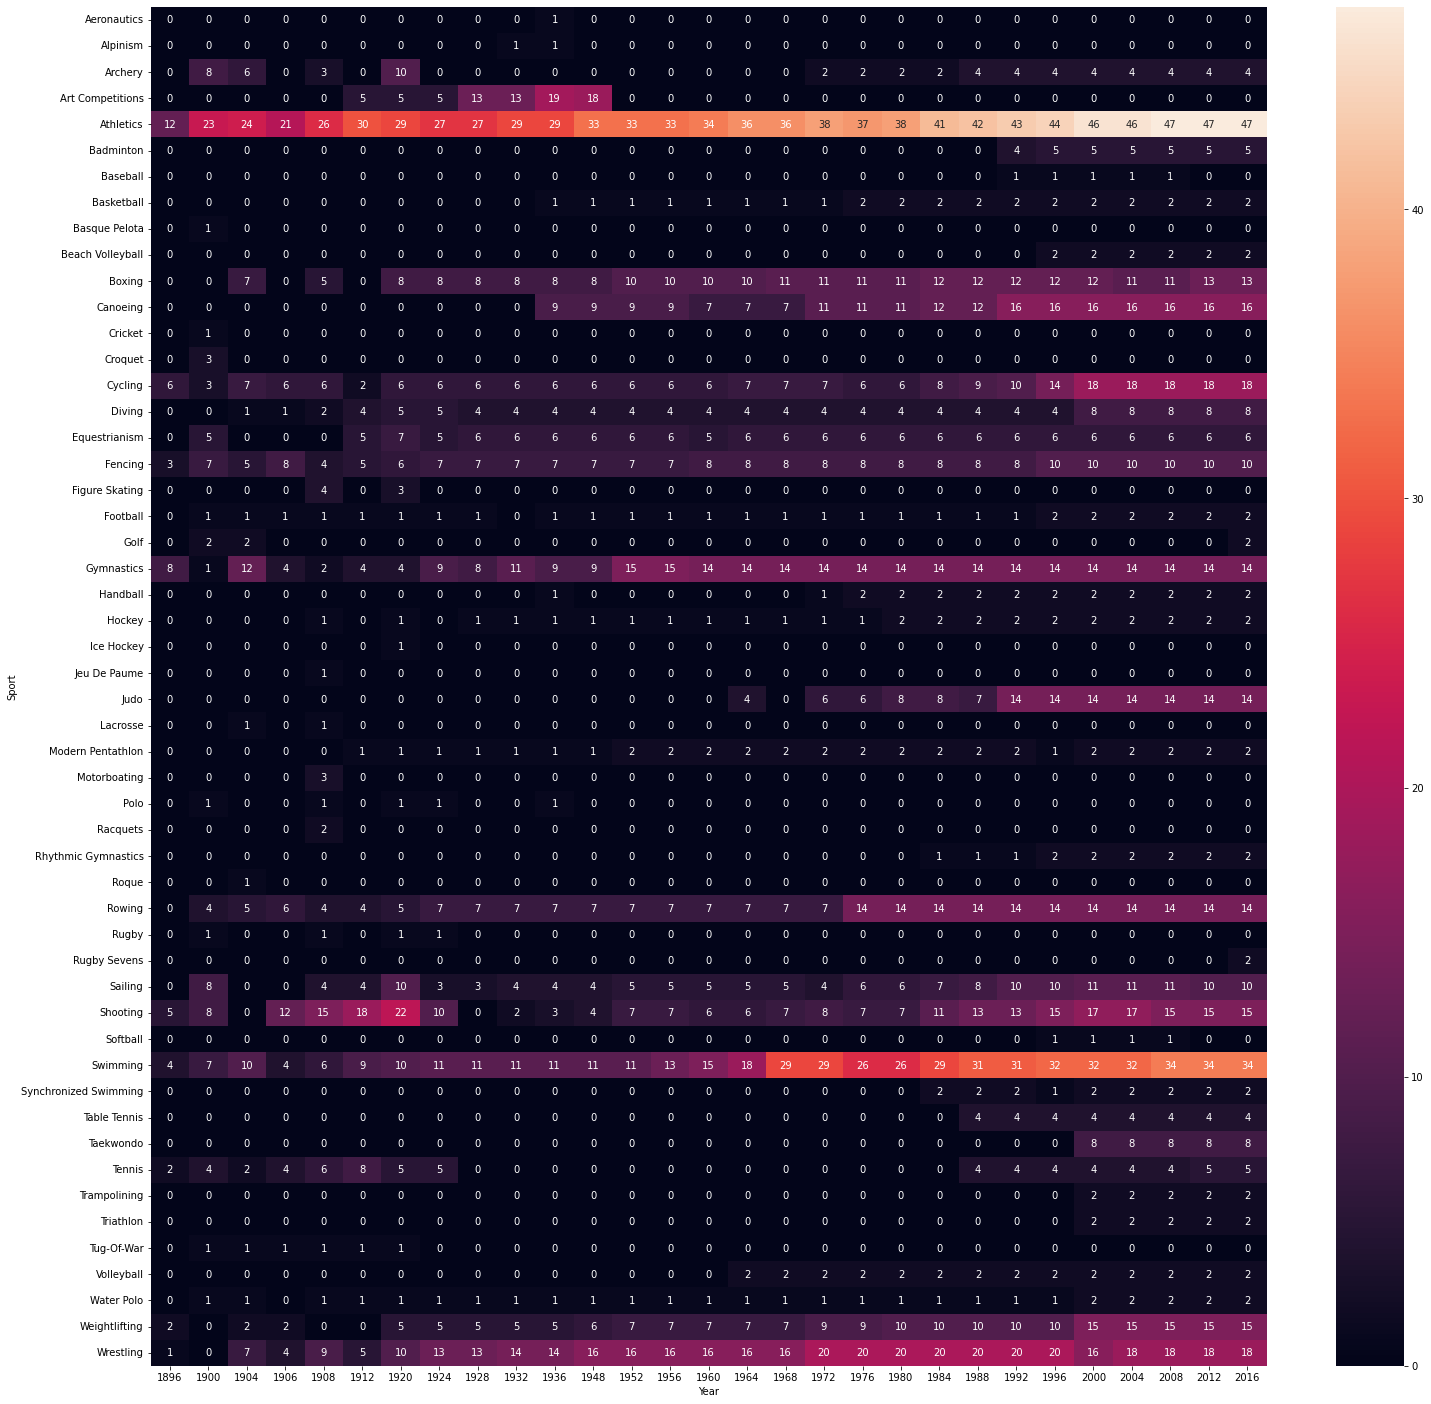

In [483]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(heat_map_events,annot=True)

## MOST DECORATED ATHLETES IN OLYMPICS

In [484]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [485]:
def most_succesful(df3 , sport):
    
    df3 = df3.dropna(subset = "Medal")
    
    if sport != "Overall":
        df_succesful = df3[df3["Sport"] == sport][["Name","region"]].value_counts().reset_index().head(10)
        df_succesful  = df_succesful .rename(columns = {'index':'Athlete' ,0:"Medals"}) 
    else:
        print("Hey")
        df_succesful = df3[["Name","Sport","region"]].value_counts().reset_index().head(10)
        df_succesful  = df_succesful .rename(columns = {0:"Medals"})

    return df_succesful

In [486]:
most_succesful(athlete_summer , "Overall" )

Hey


,Name,Sport,region,Medals
0,"Michael Fred Phelps, II",Swimming,USA,28
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,18
2,Nikolay Yefimovich Andrianov,Gymnastics,Russia,15
3,Borys Anfiyanovych Shakhlin,Gymnastics,Russia,13
4,Edoardo Mangiarotti,Fencing,Italy,13
5,Takashi Ono,Gymnastics,Japan,13
6,Birgit Fischer-Schmidt,Canoeing,Germany,12
7,Aleksey Yuryevich Nemov,Gymnastics,Russia,12
8,Ryan Steven Lochte,Swimming,USA,12
9,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,USA,12


In [487]:
sport = athlete_summer["Sport"].unique().tolist()
sport.sort()
sport.insert(0,"Overall")


In [488]:
sport

['Overall',
 'Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

## Country- wise Analysis
1.Country Wise medal tally per year Line plot
2.Heat Map of country Vs Sport
3.Most Successful Athlete


In [489]:
athlete_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [519]:
def country_medal(df5 , country):
    if country != "Overall":
        df5 = df5.drop_duplicates(subset = ["Sex" , "NOC" , "Games" , "Year" , "Sport" ,"City" ,"Event" , "Medal"])        
        df5 = df5[df5["region"] == country].groupby(df5["Year"]).sum()[["Gold" , "Silver" , "Bronze"]]
        df5["Medals"] = df5["Gold"] + df5["Silver"] + df5["Bronze"]
        #df5 = df5.rename(columns = {'index':'Years'}) 
        
        return df5
    else:
        pass
        


In [529]:
df5 = country_medal(athlete_summer,"India")

In [530]:
fig = px.line(df5 , x = df5.index , y = "Medals")
fig.show()

In [872]:
#Heat Map of country
def heat_map_country(df6 , country):
    
    df6.drop_duplicates(subset = ["Year" , "Sport" , "Event" , "region","Medal"] ,inplace =True )
    df6 = df6.dropna(subset=["Medal"])
    df6["Medals"] = df6["Gold"] + df6["Silver"] + df6["Bronze"]
    df6 = df6[df6["region"] == country]     
    df6 = df6.pivot_table(index = "Sport" , columns = "Year" , values="Medals" , aggfunc="count").fillna(0).astype(int)
    return df6
    

In [873]:
df14 = athlete_summer.copy()

In [874]:
heat_country = heat_map_country(df14 , "Afghanistan")

In [875]:
heat_country

Year,2008,2012
Sport,,
Taekwondo,1,1


<AxesSubplot:xlabel='Year', ylabel='Sport'>

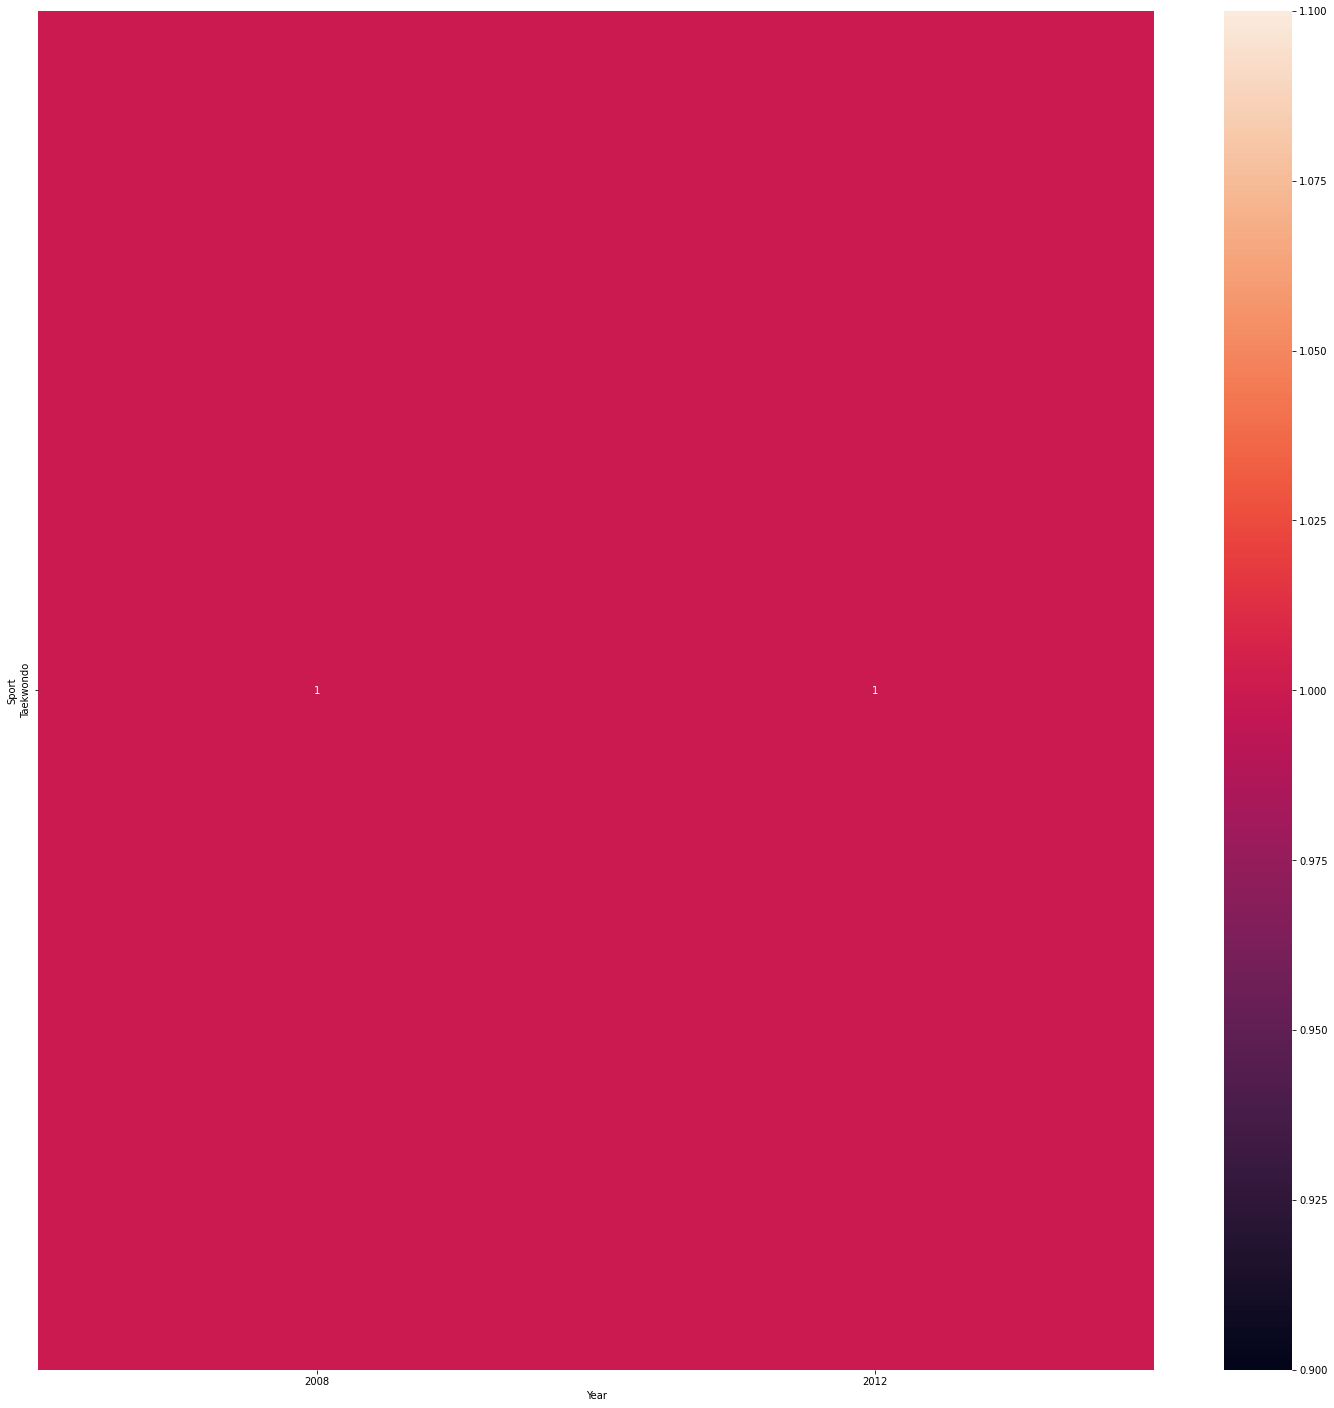

In [871]:
plt.figure(figsize=(25,25))
sns.heatmap(heat_country,annot=True)

In [633]:
#3.Most Successful Athlete
def succesful_country(df6 , country):
    
    df6 = df6.drop_duplicates(subset = ["Year" , "Sport" , "Event" , "region" ,"Name"] )    
    df6 = df6.dropna(subset=["Medal"])
    df6 = df6[df6["region"] == country][["Name" , "Sport"]].value_counts().head(10).reset_index()     
    df6 = df6.rename(columns = {0:"Medals"})
    
    return df6

In [634]:
succesful_country(athlete_summer ,"USA")

,Name,Sport,Medals
0,"Michael Fred Phelps, II",Swimming,28
1,Natalie Anne Coughlin (-Hall),Swimming,12
2,Ryan Steven Lochte,Swimming,12
3,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,12
4,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,12
5,"Matthew Nicholas ""Matt"" Biondi",Swimming,11
6,Carl Townsend Osburn,Shooting,11
7,Mark Andrew Spitz,Swimming,11
8,"Gary Wayne Hall, Jr.",Swimming,10
9,"Frederick Carlton ""Carl"" Lewis",Athletics,10


### Athlete Wise Analysis

In [636]:
import plotly.figure_factory as ff

In [654]:
df7 = athlete_summer.copy()
df7 = df7.drop_duplicates(subset = ["region" ,"Name"] )  

In [667]:
x1 = df7["Age"].dropna()
x2 = df7[df7["Medal"] == "Gold"]["Age"].dropna()
x3 = df7[df7["Medal"] == "Silver"]["Age"].dropna()
x4 = df7[df7["Medal"] == "Bronze"]["Age"].dropna()

In [672]:
fig = ff.create_distplot([x1,x2,x3,x4],["Overall Age","Gold-Medalist","Silver-Medalist","Bronze-Medalist"] , show_rug=False ,show_hist=False )
fig.show()

In [694]:
#Height - weigth Relation
df8 = athlete_summer.copy()

In [695]:
df8["Medal"].fillna("No Medal" , inplace=True)

In [704]:
df8.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,Netherlands,NaN,0,0,0


<AxesSubplot:xlabel='Weight', ylabel='Height'>

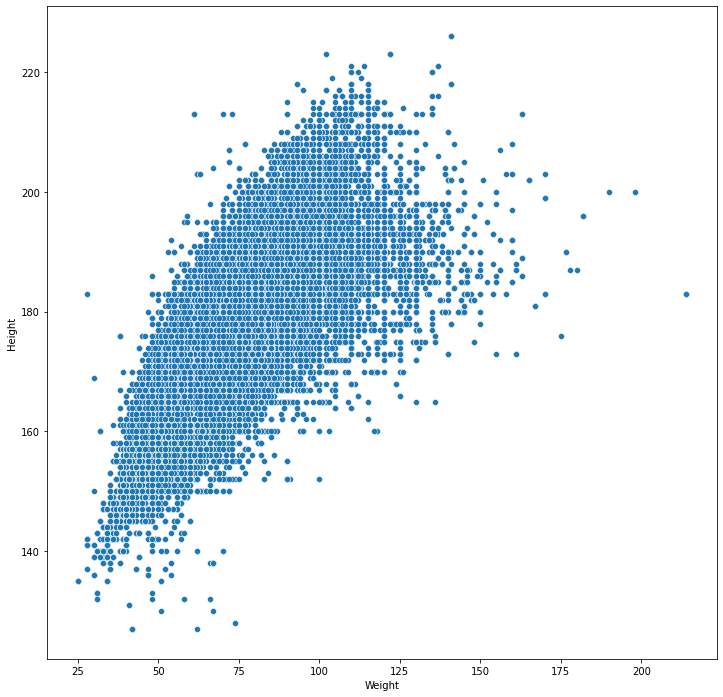

In [697]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df8["Weight"], y=df8["Height"])


<AxesSubplot:xlabel='Weight', ylabel='Height'>

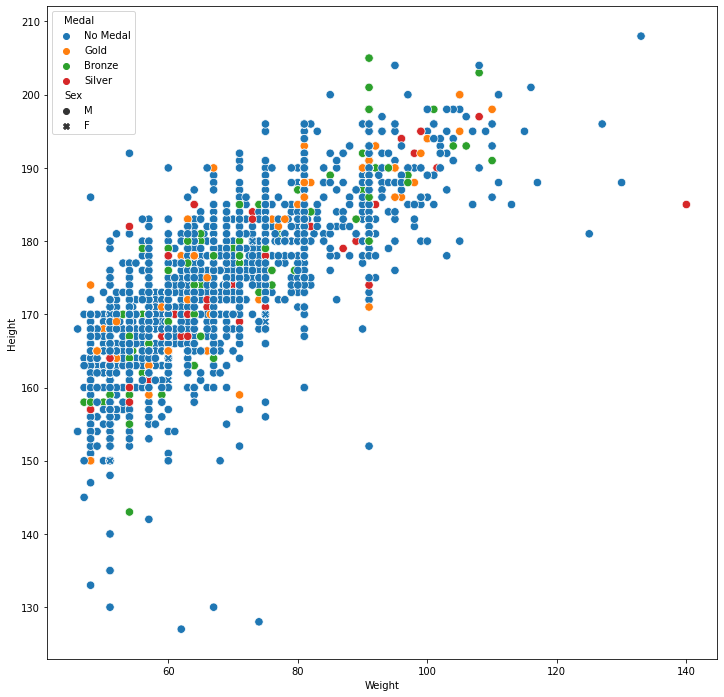

In [703]:
#for particular sport
plt.figure(figsize=(12,12))
df9 = df8[df8["Sport"] == "Boxing"]
sns.scatterplot(x=df9["Weight"], y=df9["Height"],hue = df9["Medal"] , style = df9["Sex"], s =70)

In [877]:
#Male and Female competitors over the year
df11 = athlete_summer.copy()

In [878]:
def M_F_participation(df10):
    df10.drop_duplicates(subset = ["Year" , "region" ,"Name"] , inplace = True)
    df_male = df10[df10["Sex"] == "M"].groupby(df10["Year"]).count()["Name"].reset_index()
    df_female = df10[df10["Sex"] == "F"].groupby(df10["Year"]).count()["Name"].reset_index()
    df_gender = df_male.merge(df_female , on="Year")
    df_gender  = df_gender .rename(columns = {"Name_x":"Male" , "Name_y":"Female"})
    
    
    return df_gender

In [879]:
df_gender = M_F_participation(df11)

In [742]:
fig = px.line(df_gender , x = "Year" , y =["Male" , "Female"] )
fig.show()

In [743]:
def M_F_medals(df10):
    df10.drop_duplicates(subset = ["Year" , "region" ,"Name"] , inplace = True)
    df10.dropna(subset=["Medal"] , inplace = True)
    df_male = df10[df10["Sex"] == "M"].groupby(df10["Year"]).count()["Name"].reset_index()
    df_female = df10[df10["Sex"] == "F"].groupby(df10["Year"]).count()["Name"].reset_index()
    df_gender = df_male.merge(df_female , on="Year")
    df_gender  = df_gender .rename(columns = {"Name_x":"Male" , "Name_y":"Female"})
    
    
    return df_gender

In [744]:
df_gender = M_F_medals(df11)

In [745]:
fig = px.line(df_gender , x = "Year" , y =["Male" , "Female"] )
fig.show()